### Loading Packages

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os
!cd ~/notebook/work/Earthquake

import gc

import time

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)


In [34]:
# I don't know why I don't have permissions to this file, but this seems to fix the issue
!chmod 751 ~/notebook/work/Earthquake/train.csv

### Loading the Data  
Let's get a quick look at the file before we read it.  This csv file has a header for two columns of data, 'acoustic_data', and 'time_to_failure'.  After loading we have a dataframe 9.4 GB object with 629,145,480 rows of int64 and float64 data.  This is probably too much.  The head of the data shows that time is measured out to 10 digits so sampling the data seems reasonable.  Casting the values to shorter lenght float and integer types seems to be a common approach in other kernels, but it just ends up rounding the time to failure data to discrete interval blocks.  I'm going to assume that the data has been collected and stored at a deliberate sampling rate and not mess around with that.  Instead, I'll create two samples of the data, one where I only look at a subsection of train in full resolution for a detailed view, and one where I sample a certain percentage of the entire train dataset for a birdseye view of the data.

In [80]:
!head -10 train.csv

acoustic_data,time_to_failure
12,1.4690999832
6,1.4690999821
8,1.469099981
5,1.4690999799
8,1.4690999788
8,1.4690999777
9,1.4690999766
7,1.4690999755
-5,1.4690999744


In [95]:
def sample_csv(filename, nth_line):
    """
    Reads every nth line of a csv file, so if n = 100, every 100th line is read
    and a 1% sample is taken
    https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame
    """
    df = pd.read_csv(filename, header = 0, skiprows = lambda i: i % n != 0)
    return df

In [96]:
%%time
train_overview = sample_csv('train.csv', nth_line = 100)

CPU times: user 4min 16s, sys: 2.73 s, total: 4min 19s
Wall time: 4min 19s


In [97]:
train_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291454 entries, 0 to 6291453
Data columns (total 2 columns):
acoustic_data      int64
time_to_failure    float64
dtypes: float64(1), int64(1)
memory usage: 96.0 MB


In [98]:
train_overview.head()

,acoustic_data,time_to_failure
0,9,1.469100
1,5,1.469100
2,0,1.469100
3,1,1.469100
4,1,1.469099


In [99]:
train_overview.describe()

,acoustic_data,time_to_failure
count,6.291454e+06,6.291454e+06
mean,4.520574e+00,5.678293e+00
std,1.051612e+01,3.672698e+00
min,-3.196000e+03,9.552926e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173372e+00
max,4.088000e+03,1.610740e+01


### Plotting the Overview  
The acoustic data seems to be some sort of waveform and the time to failure looks like a sawtooth pattern.  What we are actually looking at is a stream of data showing 16 different failures.  The time to failure is zero when a failure occurs.  Incidentally, the acoustic data shows significant local peaks when the time to failure is zero.  I don't know if these peaks define a failure or if this is a labeled dataset.  The time to failure peaks at a value corresponding to the time between failures.  The sawtooth graph we are seeing actually should be a discontinuous set of lines all of the same negative slope but with different heights.

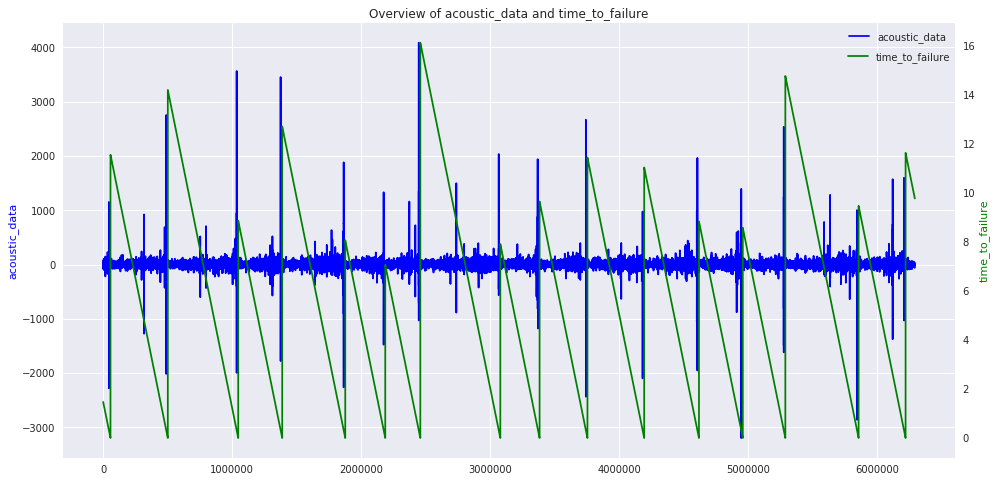

In [104]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title('Overview of acoustic_data and time_to_failure')
plt.plot(train_overview['acoustic_data'], color = 'b')
ax1.set_ylabel('acoustic_data', color = 'b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_overview['time_to_failure'], color = 'g')
ax2.set_ylabel('time_to_failure', color = 'g')
plt.legend(['time_to_failure'], loc = (0.875, 0.9))
plt.grid(False)

In [121]:
# Locations of failures in train_overview 
failures = train_overview.loc[train_overview['time_to_failure'].diff() > 1].index - 1
train_overview.loc[failures]

,acoustic_data,time_to_failure
56564,8,0.000796
500857,4,0.000696
1046772,4,0.000796
1387723,0,0.001096
1876417,3,0.000596
2186525,6,0.001096
2458294,0,0.000496
3078388,3,0.000696
3382761,-1,0.000196
3753777,1,0.000496


In [145]:
train_detail = train_overview[56564:500857]

In [138]:
# train_detail = pd.read_csv('train.csv', skiprows = range(1, 56564*100), nrows = (500857*100-56564*100))

In [146]:
train_detail.head()

,acoustic_data,time_to_failure
56564,8,0.000796
56565,3,11.540800
56566,9,11.540800
56567,3,11.540800
56568,6,11.540800


In [143]:
gc.collect()

9746

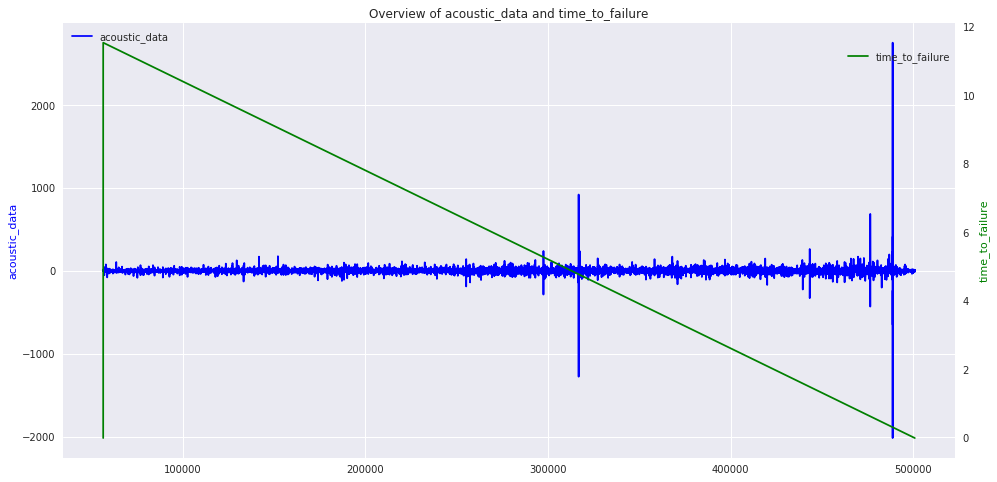

In [147]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title('Overview of acoustic_data and time_to_failure')
plt.plot(train_detail['acoustic_data'], color = 'b')
ax1.set_ylabel('acoustic_data', color = 'b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_detail['time_to_failure'], color = 'g')
ax2.set_ylabel('time_to_failure', color = 'g')
plt.legend(['time_to_failure'], loc = (0.875, 0.9))
plt.grid(False)

In [141]:
train_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44429300 entries, 0 to 44429299
Data columns (total 2 columns):
acoustic_data      int64
time_to_failure    float64
dtypes: float64(1), int64(1)
memory usage: 677.9 MB
